### German Credit Risk

The attributes of the data set are as follows:

**Age** (numeric)

**Sex** (text: male, female)

**Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

**Housing** (text: own, rent, or free)

**Saving accounts** (text - little, moderate, quite rich, rich)

**Checking account** (numeric, in DM - Deutsch Mark)

**Credit amount** (numeric, in DM)

**Duration** (numeric, in month)

**Purpose** (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [56]:
# Importing Libraries 
import pandas as pd
import numpy as np
import sklearn

In [2]:
# For Visaulisation purpose 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import the dataset 
df=pd.read_csv("C:/Users/Poonkundran K/Desktop/Git Hub/German credit card/german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
df = df.drop('Unnamed: 0', axis =1)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
df['Risk']

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Risk, Length: 1000, dtype: object

In [6]:
## We have to encode the risk column and give value as 1 to bad and 0 to good

In [7]:
# Define a function to label the risk
def label_risk(risk_value):
    if risk_value == 'bad':
        return 1
    else:
        return 0

# Apply the function to create a new "Risk_Label" column
df['Risk'] = df['Risk'].apply(label_risk)

In [8]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [10]:
##Missing values are there in savings accounts and checking account

In [11]:
for col in df.columns:
    count = pd.DataFrame(df[col].value_counts(normalize = True)*100)
    print(count)

    Age
27  5.1
26  5.0
23  4.8
24  4.4
28  4.3
25  4.1
30  4.0
35  4.0
36  3.9
31  3.8
29  3.7
32  3.4
33  3.3
34  3.2
37  2.9
22  2.7
40  2.5
38  2.4
42  2.2
39  2.1
46  1.8
43  1.7
47  1.7
44  1.7
41  1.7
45  1.5
20  1.4
21  1.4
49  1.4
50  1.2
48  1.2
54  1.0
57  0.9
52  0.9
51  0.8
55  0.8
63  0.8
61  0.7
53  0.7
60  0.6
65  0.5
58  0.5
64  0.5
66  0.5
74  0.4
67  0.3
68  0.3
56  0.3
59  0.3
75  0.2
19  0.2
62  0.2
70  0.1
         Sex
male    69.0
female  31.0
    Job
2  63.0
1  20.0
3  14.8
0   2.2
      Housing
own      71.3
rent     17.9
free     10.8
            Saving accounts
little            73.806610
moderate          12.607099
quite rich         7.711138
rich               5.875153
          Checking account
little           45.214521
moderate         44.389439
rich             10.396040
      Credit amount
1478            0.3
1262            0.3
1258            0.3
1275            0.3
1393            0.3
...             ...
1459            0.1
882             0.1
3758 

In [12]:
df.describe()

,Age,Job,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.300000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


In [13]:
## It seems that Credit Amount and Duration column has outliers

In [14]:
missing_cat=[var for var in df.columns if df[var].isnull().sum()>0 and df[var].dtypes=='O']
missing_cat

['Saving accounts', 'Checking account']

In [15]:
for X in missing_cat:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,df[X].isnull().sum(),(df[X].isnull().sum()/1000)*100 ))

number and % of missing record for Saving accounts are 183 and 18.3% respectively
number and % of missing record for Checking account are 394 and 39.4% respectively


In [16]:
for X in ['Saving accounts']:
    print("most appearing value for {} is {}".format(X,df[X].mode()))

most appearing value for Saving accounts is 0    little
Name: Saving accounts, dtype: object


In [17]:
# Replacing the values of savings account with little
for i in [0,1]:
    df['Saving accounts'].fillna('little',inplace=True)

In [18]:
# Dropping checking account columns
df.drop(columns = ['Checking account'], inplace = True)

In [19]:
# Check the number of missing now for all categorical variable
for X in df.select_dtypes(include=['object']).columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,df[X].isnull().sum(),(df[X].isnull().sum()/1000)*100 ))

number and % of missing record for Sex are 0 and 0.0% respectively
number and % of missing record for Housing are 0 and 0.0% respectively
number and % of missing record for Saving accounts are 0 and 0.0% respectively
number and % of missing record for Purpose are 0 and 0.0% respectively


#### No missing records in categorical variable

#### Similarly we can treat the missing for numberical (Int and Float) type columns

In [20]:
missing_cont=[var for var in df.describe().columns if df[var].isnull().sum()>0 and (df[var].dtypes=='Float64' or df[var].dtypes=='Int64')]
missing_cont

[]

In [21]:
# Check the number of missing for all numberic columns 
for X in df.describe().columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,df[X].isnull().sum(),(df[X].isnull().sum()/262428)*100 ))

number and % of missing record for Age are 0 and 0.0% respectively
number and % of missing record for Job are 0 and 0.0% respectively
number and % of missing record for Credit amount are 0 and 0.0% respectively
number and % of missing record for Duration are 0 and 0.0% respectively
number and % of missing record for Risk are 0 and 0.0% respectively


#### No missing value can be seen now 

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


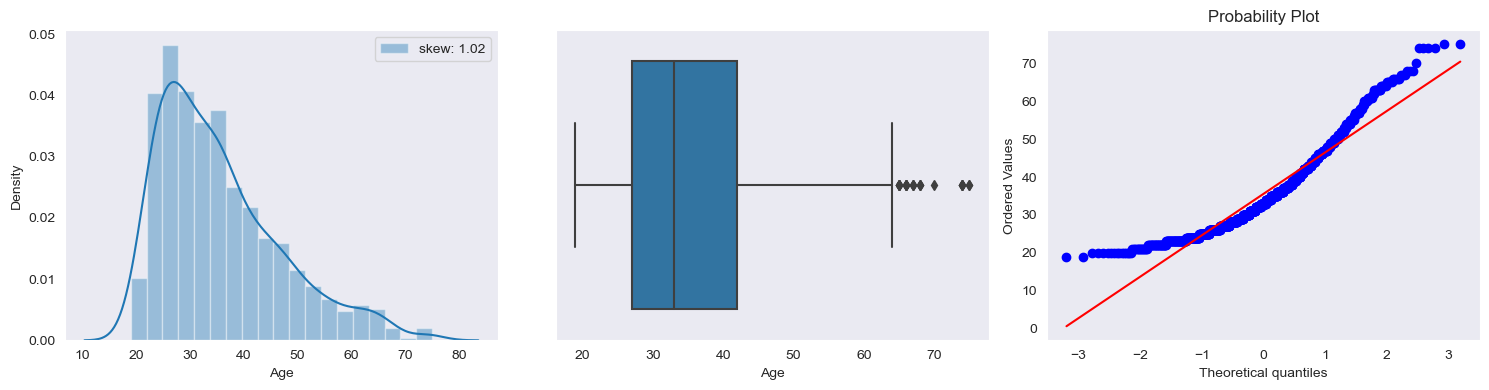

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


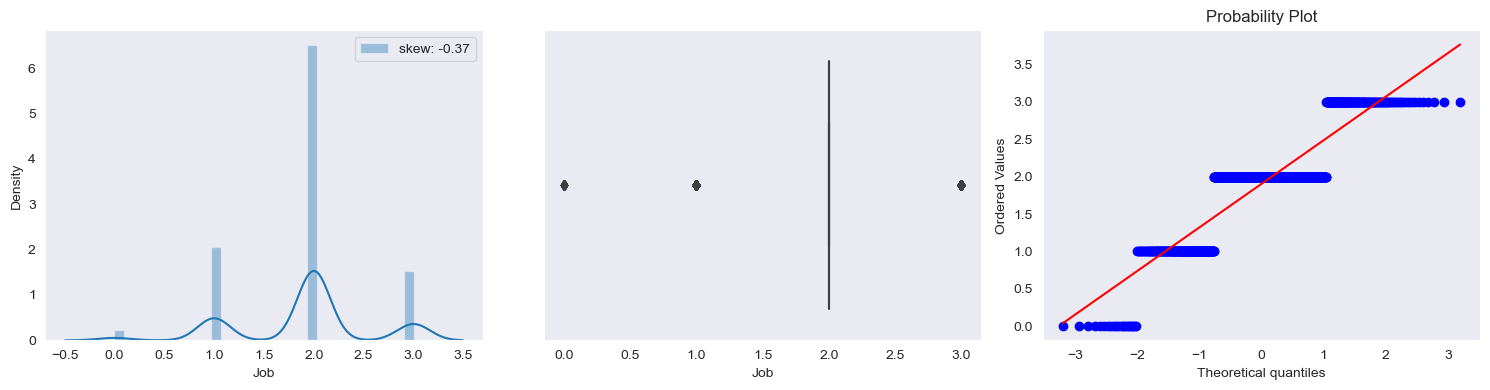

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


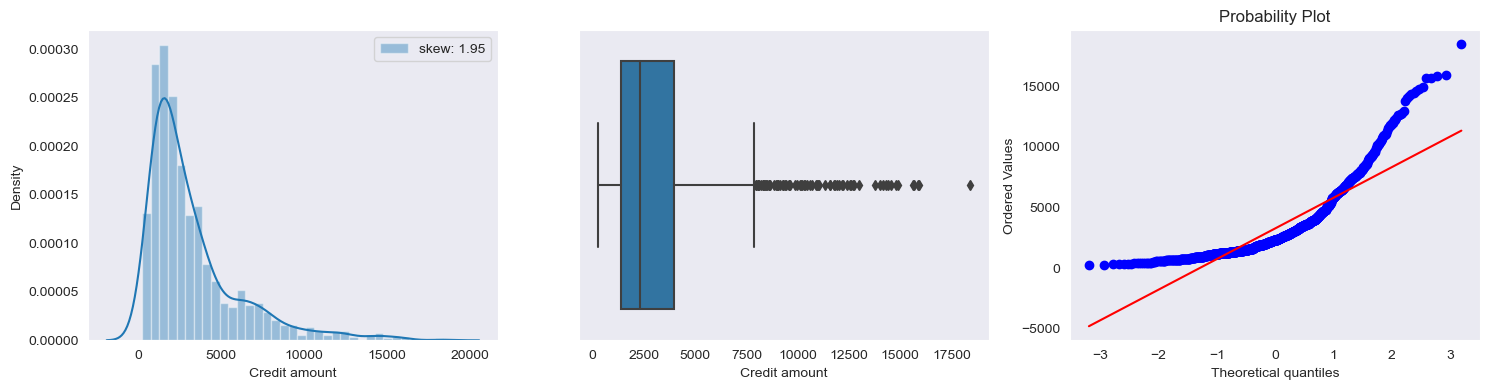

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


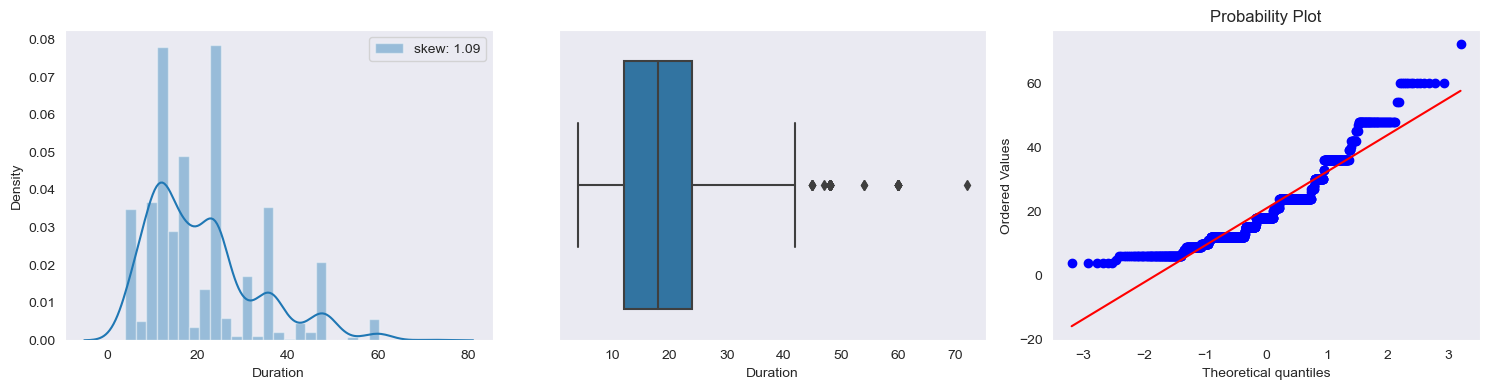

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


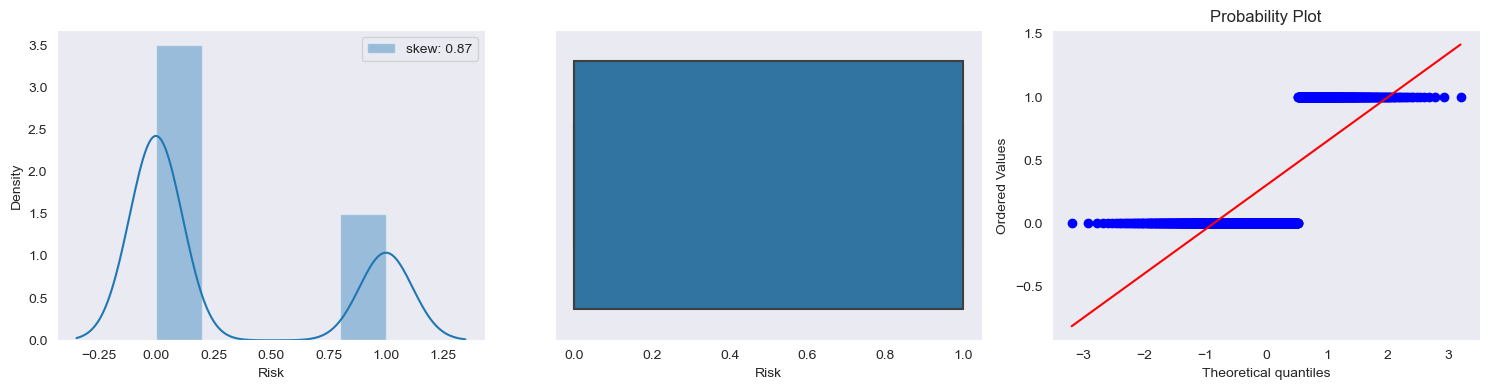

In [22]:
# Ploting graph for each varables to understand outliers
from scipy import stats

df1=df
sns.set_style('dark')
for col in df.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df1[col], label="skew: " + str(np.round(df1[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df1[col])
    plt.subplot(133)
    stats.probplot(df1[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [23]:
col_sel=['Credit amount','Duration']
def iqr_capping(df, cols, factor):
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
    
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                  np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(df, col_sel, 1.5)

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


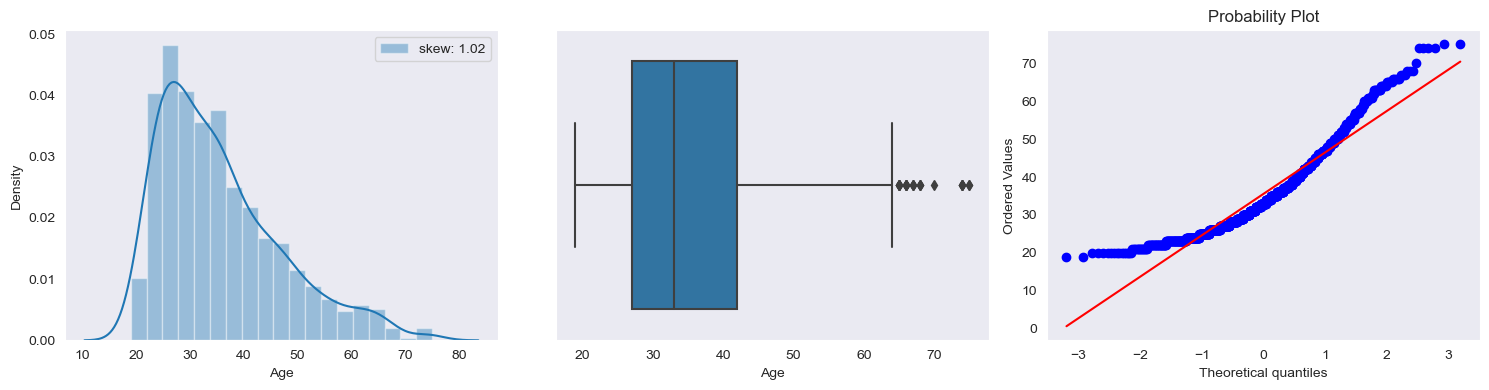

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


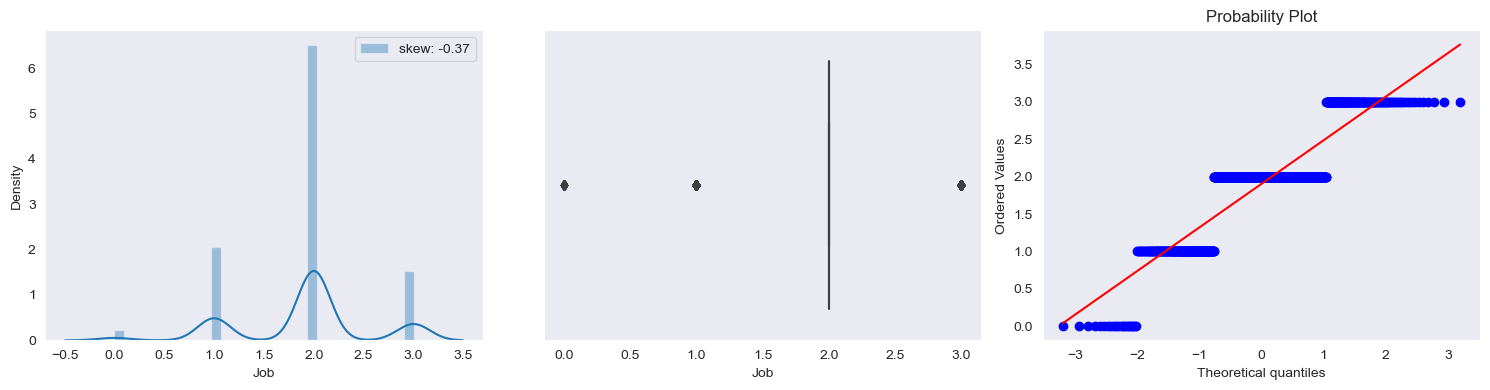

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


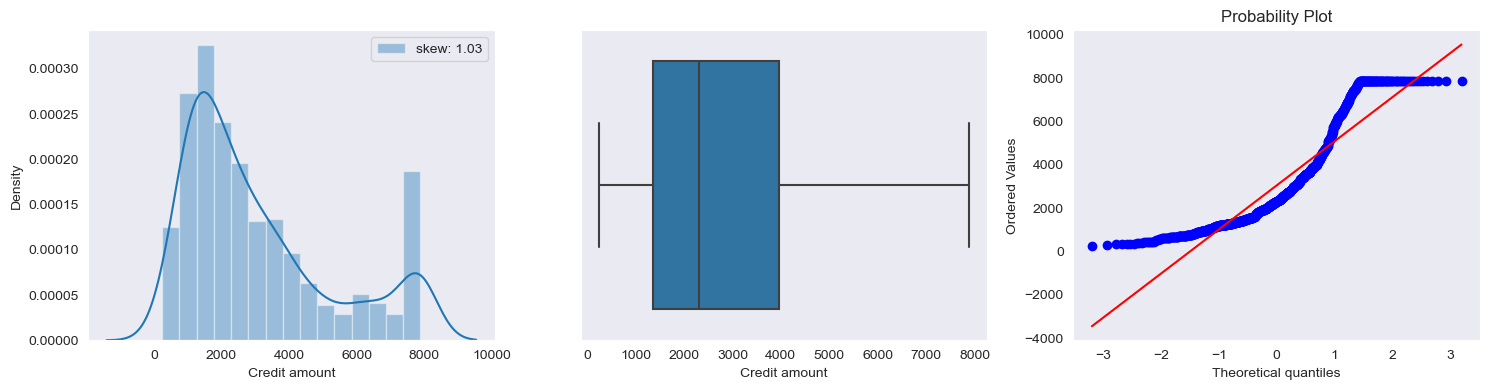

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


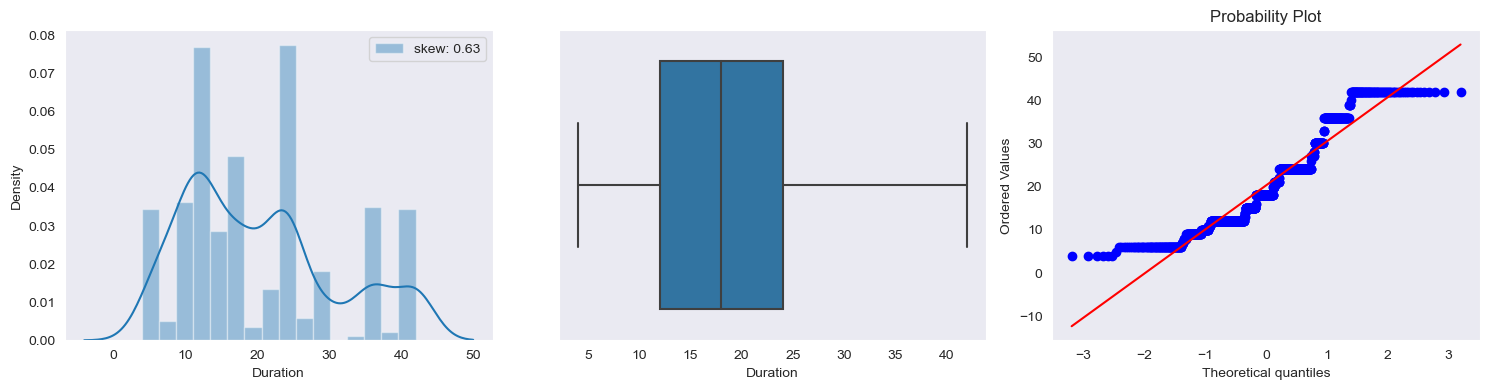

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


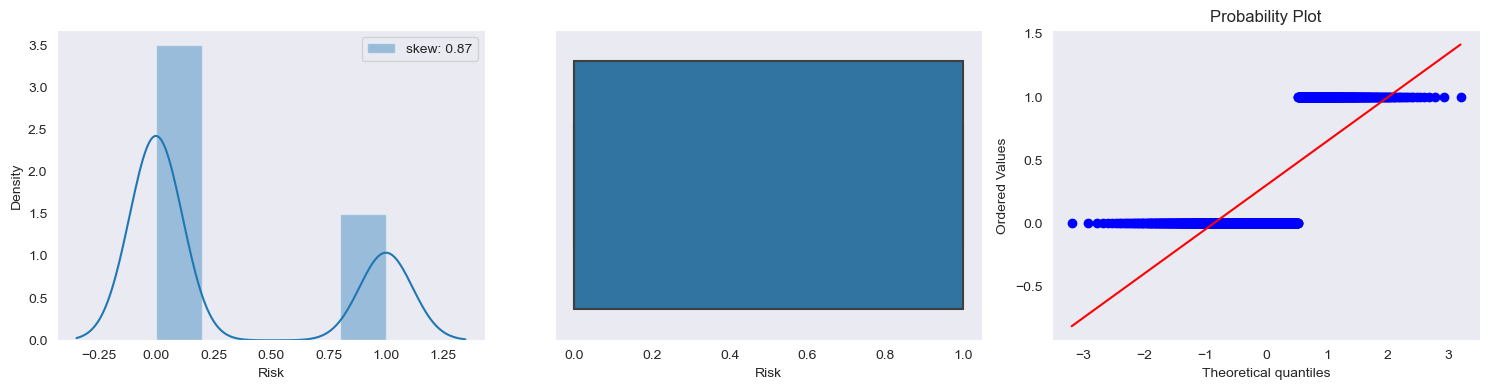

In [24]:
# Ploting graph for each varables after outlier treatment
from scipy import stats

df1=df
sns.set_style('dark')
for col in df.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df1[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df1[col])
    plt.subplot(133)
    stats.probplot(df1[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [25]:
# Having converted all to numeric variables we can check for correlation to find out not so important variable 
correlation=df.corr()
correlation

,Age,Job,Credit amount,Duration,Risk
Age,1.000000,0.015673,0.027480,-0.044372,-0.091127
Job,0.015673,1.000000,0.291740,0.216911,0.032735
Credit amount,0.027480,0.291740,1.000000,0.641783,0.128539
Duration,-0.044372,0.216911,0.641783,1.000000,0.213059
Risk,-0.091127,0.032735,0.128539,0.213059,1.000000


In [26]:
correlation

,Age,Job,Credit amount,Duration,Risk
Age,1.000000,0.015673,0.027480,-0.044372,-0.091127
Job,0.015673,1.000000,0.291740,0.216911,0.032735
Credit amount,0.027480,0.291740,1.000000,0.641783,0.128539
Duration,-0.044372,0.216911,0.641783,1.000000,0.213059
Risk,-0.091127,0.032735,0.128539,0.213059,1.000000


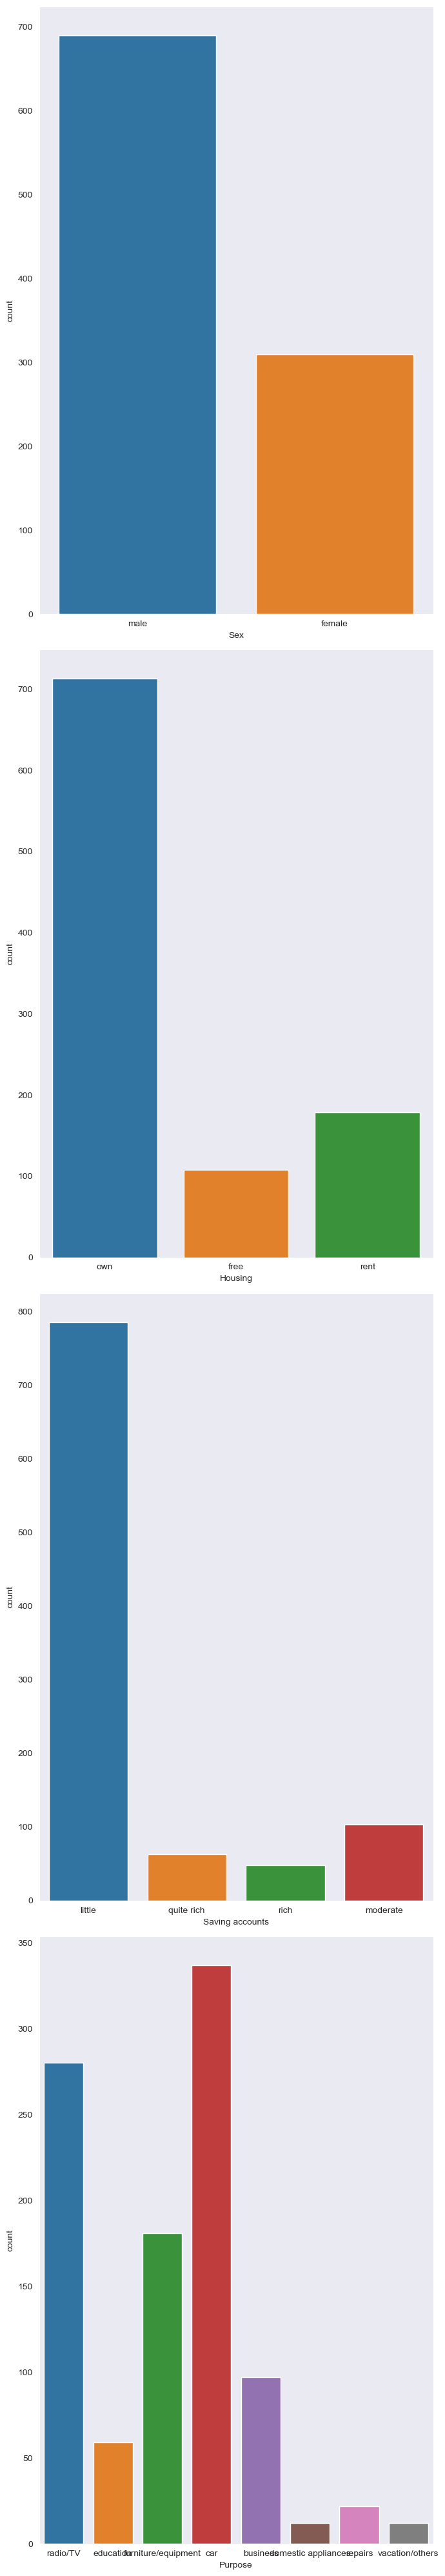

In [27]:
#count plot for categorical columns
plt.figure(figsize=(7,40))
for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplot(len(df.select_dtypes(include=['object']).columns),1, i + 1)
    sns.countplot(x = df[col])
    plt.tight_layout()

C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

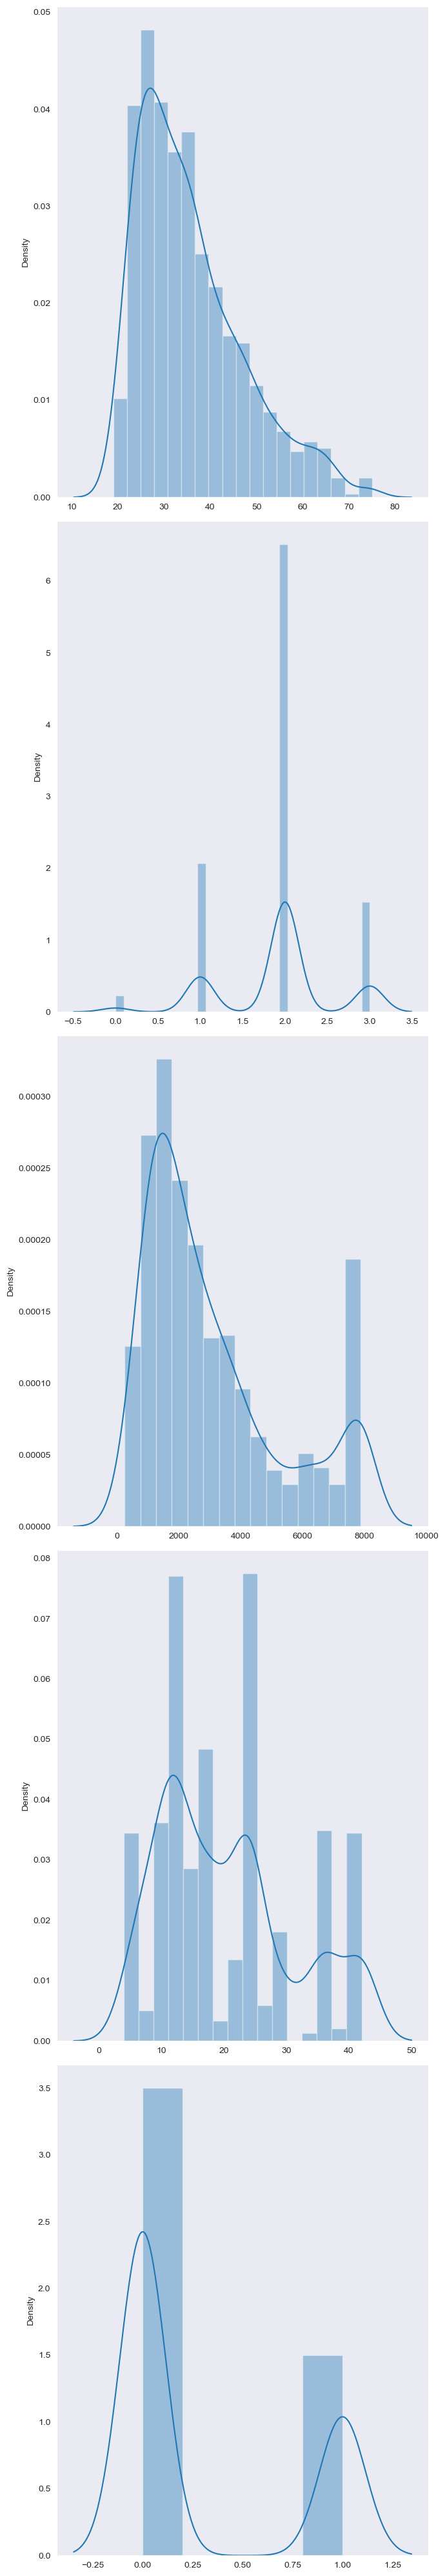

In [28]:
#dist plot for continuous columns
plt.figure(figsize=(7,40))
for i, col in enumerate(df.select_dtypes(include=['Int64','Float64']).columns):
    plt.subplot(len(df.select_dtypes(include=['Int64','Float64']).columns),1, i + 1)
    sns.distplot(x = df[col])
    plt.tight_layout()

In [29]:
df.select_dtypes(include=['Int64','Float64']).nunique()

Age               53
Job                4
Credit amount    850
Duration          27
Risk               2
dtype: int64

In [30]:
df.select_dtypes(include=['object']).nunique()

Sex                2
Housing            3
Saving accounts    4
Purpose            8
dtype: int64

## Coverting categories to numbers 

In [31]:
# split into X and y
X = df.drop(columns = ['Risk'])

y  = df['Risk']

In [32]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,Sex,Housing,Saving accounts,Purpose
0,male,own,little,radio/TV
1,female,own,little,radio/TV
2,male,own,little,education
3,male,free,little,furniture/equipment
4,male,free,little,car


In [33]:
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,1,1,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [35]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [36]:
X.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [37]:
# Let's check multicollinearity 
# to calculated VIF we can use the loop
Default_indep=X

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of Job is 0.8922589356961803
VIF for Job is 9.28
R-Sqr value of Credit amount is 0.8230965647580807
VIF for Credit amount is 5.65
R-Sqr value of Duration is 0.8686060550336905
VIF for Duration is 7.61
R-Sqr value of Sex_male is -0.12890325591978602
VIF for Sex_male is 0.89
R-Sqr value of Housing_own is 0.3567923646281469
VIF for Housing_own is 1.55
R-Sqr value of Housing_rent is 0.5173680760372394
VIF for Housing_rent is 2.07
R-Sqr value of Saving accounts_moderate is 0.12446053000374968
VIF for Saving accounts_moderate is 1.14
R-Sqr value of Saving accounts_quite rich is 0.08516001606572177
VIF for Saving accounts_quite rich is 1.09
R-Sqr value of Saving accounts_rich is 0.07090577490953442
VIF for Saving accounts_rich is 1.08
R-Sqr value of Purpose_car is -0.12895129013887519
VIF for Purpose_car is 0.89
R-Sqr value of Purpose_domestic appliances is 0.09672514516033182
VIF for Purpose_domestic appliances is 1.11
R-Sqr value of Purpose_education is 0.3118934394513462
VIF fo

In [38]:
X = X.drop(['Job'], axis = 1)

In [39]:
# Let's check multicollinearity after dropping Job
# to calculated VIF we can use the loop
Default_indep=X

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of Credit amount is 0.8164425542295293
VIF for Credit amount is 5.45
R-Sqr value of Duration is 0.8651529622271755
VIF for Duration is 7.42
R-Sqr value of Sex_male is -0.14351872795048992
VIF for Sex_male is 0.87
R-Sqr value of Housing_own is 0.3318025638928399
VIF for Housing_own is 1.5
R-Sqr value of Housing_rent is 0.4997680704845503
VIF for Housing_rent is 2.0
R-Sqr value of Saving accounts_moderate is 0.12273861708239042
VIF for Saving accounts_moderate is 1.14
R-Sqr value of Saving accounts_quite rich is 0.08501625650625866
VIF for Saving accounts_quite rich is 1.09
R-Sqr value of Saving accounts_rich is 0.0705549114097832
VIF for Saving accounts_rich is 1.08
R-Sqr value of Purpose_car is -0.1911972127141477
VIF for Purpose_car is 0.84
R-Sqr value of Purpose_domestic appliances is 0.09001819566913494
VIF for Purpose_domestic appliances is 1.1
R-Sqr value of Purpose_education is 0.2934427653401559
VIF for Purpose_education is 1.42
R-Sqr value of Purpose_furniture/equip

In [40]:
df['Duration']

0       6.0
1      42.0
2      12.0
3      42.0
4      24.0
       ... 
995    12.0
996    30.0
997    12.0
998    42.0
999    42.0
Name: Duration, Length: 1000, dtype: float64

In [41]:
df['Credit amount']

0      1169.0
1      5951.0
2      2096.0
3      7882.0
4      4870.0
        ...  
995    1736.0
996    3857.0
997     804.0
998    1845.0
999    4576.0
Name: Credit amount, Length: 1000, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression()
#fitting the model-
model.fit(X_train,y_train)

C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poonkundran K\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.984
Confusion Matrix:
 [[244   0]
 [  4   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       244
           1       1.00      0.33      0.50         6

    accuracy                           0.98       250
   macro avg       0.99      0.67      0.75       250
weighted avg       0.98      0.98      0.98       250



In [51]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_test,y_pred)
print('ROC Score:',roc_score)

ROC Score: 0.6666666666666666


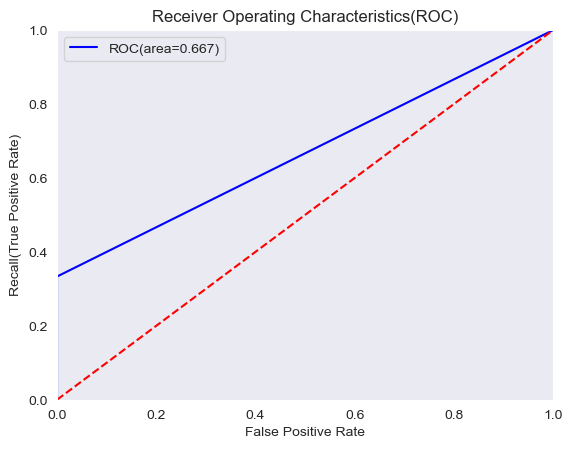

AUC: 0.6666666666666666


In [54]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Receiver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)